<a href="https://colab.research.google.com/github/Faizaanp/stock-predictions/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



MinMaxScaler: covnerts the give range of input into 0,1

eg: nos= [10, 20, 30, 40], min = 10 and max = 40
minmax ouput: [0.0, 0.33, 0.66, 1.0]

Sequential: used to build neuarl networks

Dense: simplest from of neuarl network, every node connected to every other node in the next layer
LSTM: Long Short-Term Memory

In [5]:
#libs import
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [6]:
df = yf.download('AAPL', start='2012-01-01', end='2022-01-01')


[*********************100%***********************]  1 of 1 completed


In [7]:
df.shape

(2517, 5)

Text(0, 0.5, 'Close Price')

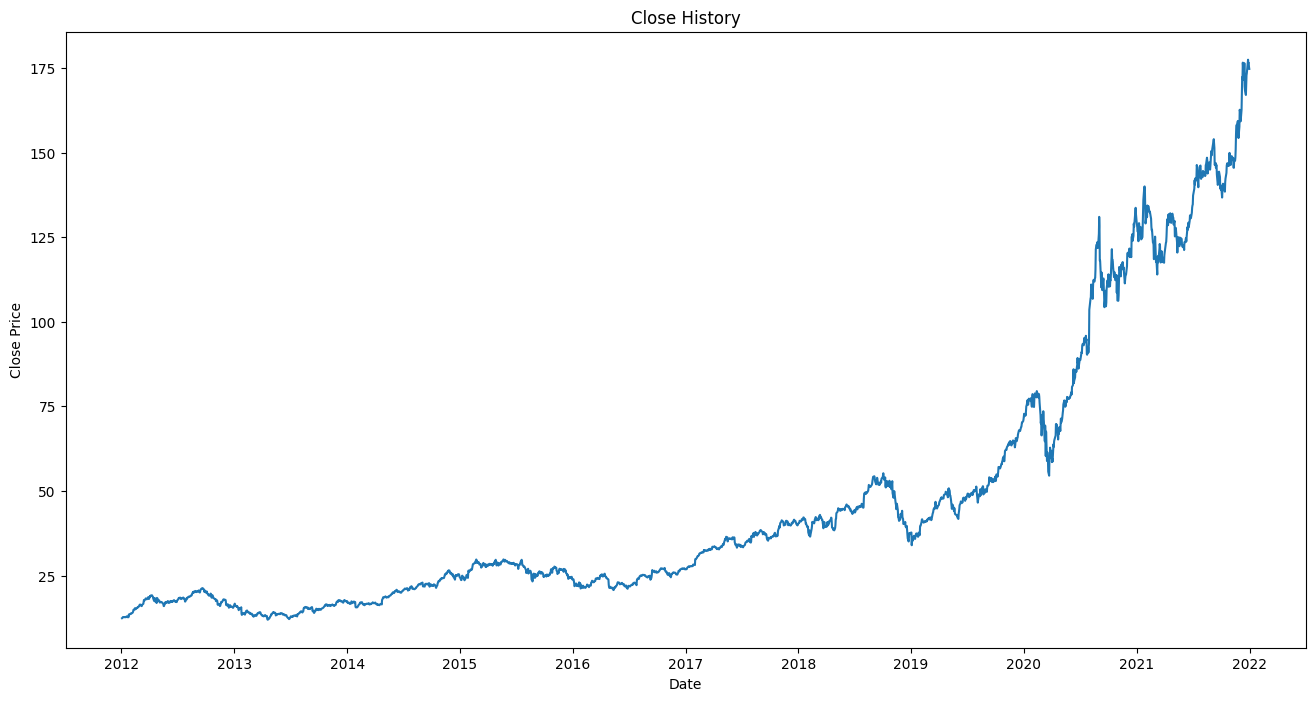

In [8]:
plt.figure(figsize=(16,8))
plt.title('Close History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')

In [9]:
print(df.columns)
print(df.head())

close_data = df[['Close']]
close_data.head()

dataset = close_data.values
dataset

training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2012-01-03  12.388998  12.427259  12.321816  12.333867  302220800
2012-01-04  12.455577  12.492935  12.330250  12.351941  260022000
2012-01-05  12.593859  12.609524  12.432379  12.501069  271269600
2012-01-06  12.725513  12.736057  12.629710  12.646280  318292800
2012-01-09  12.705331  12.886694  12.693882  12.818909  394024400


2014

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00271907],
       [0.0031214 ],
       [0.00395702],
       ...,
       [0.99435197],
       [0.98733624],
       [0.98359071]])

In [11]:
train_data = scaled_data[:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

print(x_train[0:10])
print(y_train[0:10])


[array([0.00271907, 0.0031214 , 0.00395702, 0.00475258, 0.00463063,
       0.0049055 , 0.0047799 , 0.0045687 , 0.00428107, 0.0051713 ,
       0.00597415, 0.00572655, 0.00437027, 0.00566466, 0.00439029,
       0.00916915, 0.00879959, 0.009282  , 0.01032518, 0.01095687,
       0.01090408, 0.01070929, 0.01153945, 0.01232045, 0.01320521,
       0.0146343 , 0.01763637, 0.01768186, 0.01935312, 0.02060196,
       0.01845557, 0.0192821 , 0.01926571, 0.02158324, 0.02125369,
       0.02186361, 0.02295955, 0.02356939, 0.02532618, 0.02660605,
       0.02697558, 0.02710484, 0.02491658, 0.02438863, 0.0244669 ,
       0.02652411, 0.02710302, 0.02834642, 0.03127743, 0.03518792,
       0.03445605, 0.0344579 , 0.03728513, 0.03816992, 0.03754002,
       0.03696471, 0.0363658 , 0.03835559, 0.03972098, 0.04029269]), array([0.0031214 , 0.00395702, 0.00475258, 0.00463063, 0.0049055 ,
       0.0047799 , 0.0045687 , 0.00428107, 0.0051713 , 0.00597415,
       0.00572655, 0.00437027, 0.00566466, 0.00439029, 0.00

In [12]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

x_train.shape

(1954, 60, 1)

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1954/1954 ━━━━━━━━━━━━━━━━━━━━ 65s 32ms/step - loss: 0.0013


In [16]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [17]:
print(y_test[0:10])
print(x_test[0:10])

[[72.66271973]
 [72.32097626]
 [73.48435211]
 [75.04521942]
 [75.2148819 ]
 [76.8217926 ]
 [75.78443909]
 [75.45967865]
 [76.40491486]
 [77.25078583]]
[array([0.25936953, 0.26383779, 0.27277442, 0.27227793, 0.27147481,
       0.27008756, 0.27141645, 0.27306648, 0.27905344, 0.27825028,
       0.28295213, 0.28353623, 0.28791699, 0.29152371, 0.28311284,
       0.28306902, 0.29110025, 0.30140946, 0.30386262, 0.30332234,
       0.30348301, 0.3078182 , 0.30885813, 0.31187531, 0.31152373,
       0.31519987, 0.31251975, 0.31708919, 0.31905172, 0.31786543,
       0.3133251 , 0.31159692, 0.31126009, 0.31798253, 0.3149363 ,
       0.32013565, 0.31927154, 0.31474575, 0.30784756, 0.31120144,
       0.31682557, 0.32433908, 0.31878814, 0.32107298, 0.324427  ,
       0.32543749, 0.33084195, 0.33774026, 0.33854587, 0.33756456,
       0.33797456, 0.3371251 , 0.34380377, 0.3441992 , 0.35245954,
       0.35229841, 0.35481763, 0.35793731, 0.36775008, 0.36347344]), array([0.26383779, 0.27277442, 0.27227793,

In [18]:
x_test = np.array(x_test)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
x_test.shape

(503, 60, 1)

In [19]:
prediction = model.predict(x_test)
prediction = prediction.reshape(prediction.shape[0], prediction.shape[1])
prediction = scaler.inverse_transform(prediction)

print(prediction.shape)

print(prediction)
print(len([prediction]))

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
(503, 60)
[[ 39.62903   49.420967  56.062103 ...  71.03085   71.95734   72.37    ]
 [ 39.92046   50.285576  56.75346  ...  71.95735   72.370026  72.69102 ]
 [ 40.503952  50.805874  57.010593 ...  72.37003   72.69104   72.699356]
 ...
 [ 72.989525 115.33666  141.67133  ... 170.7081   173.88773  175.64178 ]
 [ 73.80193  116.47318  143.02132  ... 173.88779  175.64183  176.30031 ]
 [ 74.16925  117.362175 143.55907  ... 175.64189  176.30034  175.76662 ]]
1


In [20]:
y_test = y_test[:prediction.shape[0]]
rmse = np.sqrt(np.mean((prediction - y_test) ** 2))
rmse

15.07200635371811

In [21]:
train = close_data[:training_data_len]
valid = close_data[training_data_len:]
valid['Predictions'] = np.nan

<ipython-input-21-1323b3490b75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = np.nan


In [22]:
valid.loc[valid.index[-prediction.shape[0]:], 'Predictions'] = prediction[:, -1]


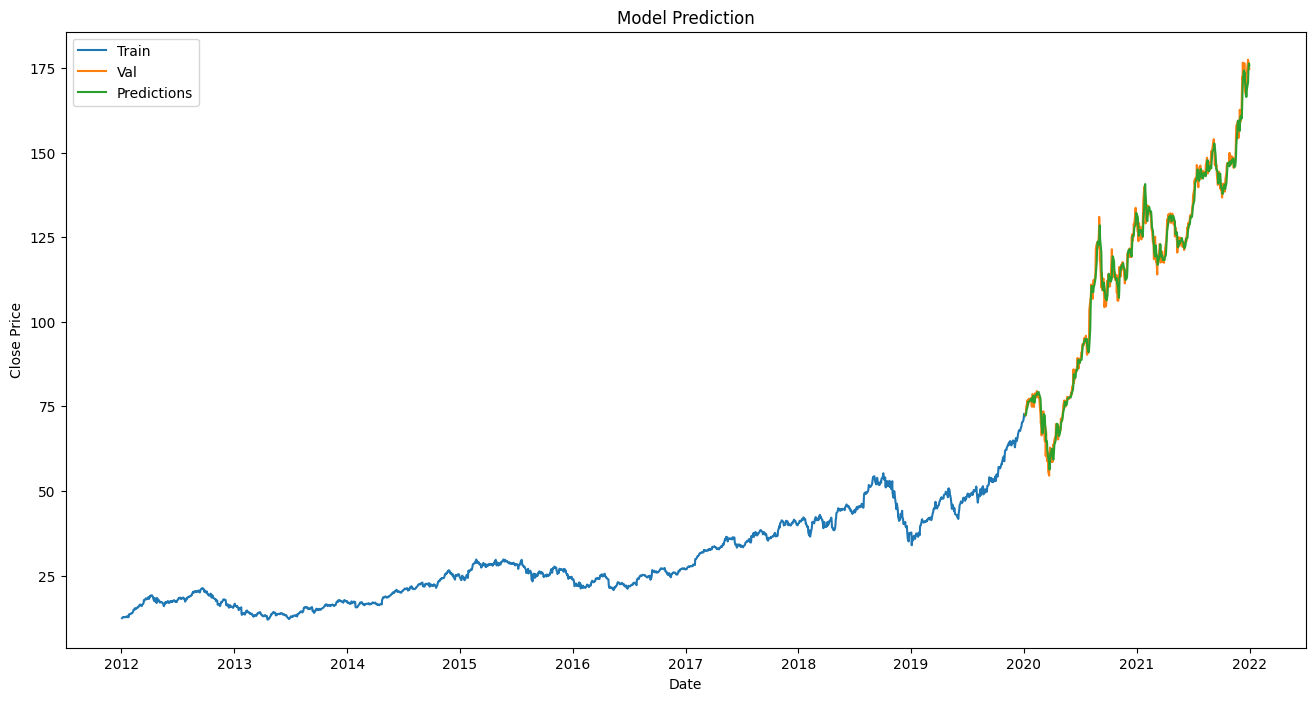

In [27]:
plt.figure(figsize=(16, 8))
plt.title('Model Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions']], label=['Val', 'Predictions'])
plt.legend(loc='upper left')


In [24]:
valid.tail()

Price,Close,Predictions
Ticker,AAPL,
Date,,
2021-12-27,177.423645,170.708008
2021-12-28,176.400421,173.887695
2021-12-29,176.488983,175.641785
2021-12-30,175.327988,176.300308
2021-12-31,174.708160,175.766617
